<a href="https://colab.research.google.com/github/sanamsabooni/Thesis_ErrorDetection/blob/main/Visualization_Thesis_ErrorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
#path
directory_path = "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [ ]:
###################################################################################################################################################################################################
#start from here if you are not combining .xlsx files

#(this is original A4988, the next one is TMC2209)data_l = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A4988.csv')
data_l = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TMC2209.csv')

In [ ]:
#Data shape, types, description

print(data_l.shape)
print(data_l.dtypes)
print(data_l.describe())

(3130589, 6)
commanded position      float64
theoretical position    float64
actual position         float64
error actual            float64
error theoretical       float64
time                    float64
dtype: object
       commanded position  theoretical position  actual position  \
count        3.130589e+06          3.130589e+06     3.130589e+06   
mean         8.188550e+01          8.170928e+01     8.189899e+01   
std          8.428358e+01          8.427655e+01     8.429362e+01   
min         -3.125000e-03         -3.057861e-01    -3.000000e-03   
25%          1.969219e+01          1.938416e+01     1.969800e+01   
50%          4.501289e+01          4.500000e+01     4.503300e+01   
75%          1.273500e+02          1.271918e+02     1.273800e+02   
max          3.000000e+02          2.996967e+02     3.000010e+02   

       error actual  error theoretical          time  
count  3.130589e+06       3.130589e+06  3.130589e+06  
mean   1.348925e-02      -1.762195e-01  6.284103e+01  
std

In [ ]:
#data preprocessing

# Dropping time and error theoretical columns

for i in range(2):
    data_l.drop(data_l.columns[len(data_l.columns)-1], axis=1, inplace = True)

In [ ]:
# rename error actual as error(output)
data_l.rename(columns={'error actual':'error'}, inplace=True)

In [ ]:
#data table
data_l

,commanded position,theoretical position,actual position,error
0,0.000000,0.000000,0.000,0.000000
1,0.000000,-0.303345,0.000,0.000000
2,0.000000,-0.303345,0.000,0.000000
3,0.001563,-0.303345,0.000,-0.001563
4,0.001563,-0.303345,0.000,-0.001563
...,...,...,...,...
3130584,0.003125,0.006714,0.005,0.001875
3130585,0.002344,0.005493,0.004,0.001656
3130586,0.001563,0.004883,0.003,0.001437
3130587,0.000781,0.003662,0.002,0.001219


In [ ]:
# Extract the features (X) and target (Y) for leadscrew
X_l = data_l.iloc[:, :-1].values  # Use all columns except the last one as features
Y_l = data_l.iloc[:, -1].values  # Use the last column as the target

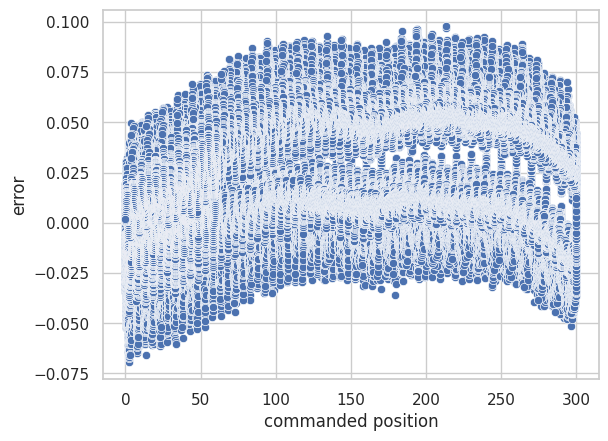

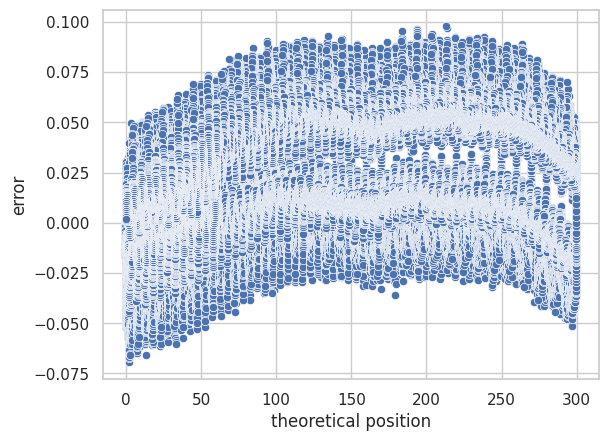

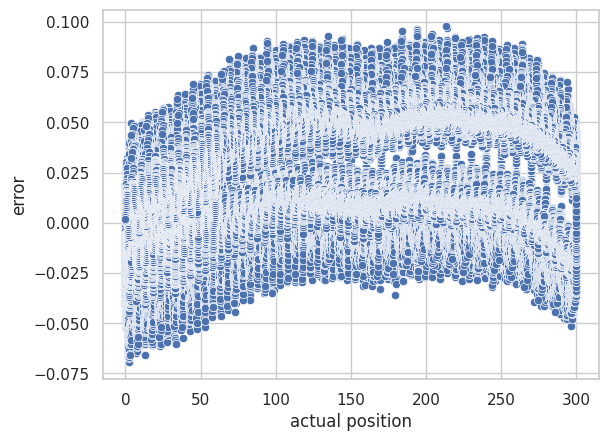

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/01_scatterplot_commanded position_against_error__before_cleaning.jpg")

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/01_scatterplot_theoretical position_against_error__before_cleaning.jpg")

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/01_scatterplot_actual position_against_error__before_cleaning.jpg")


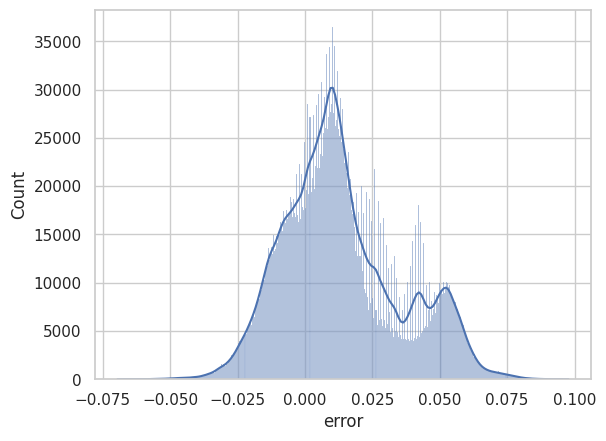

In [ ]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/02_histogram_against_error__before_cleaning.png")

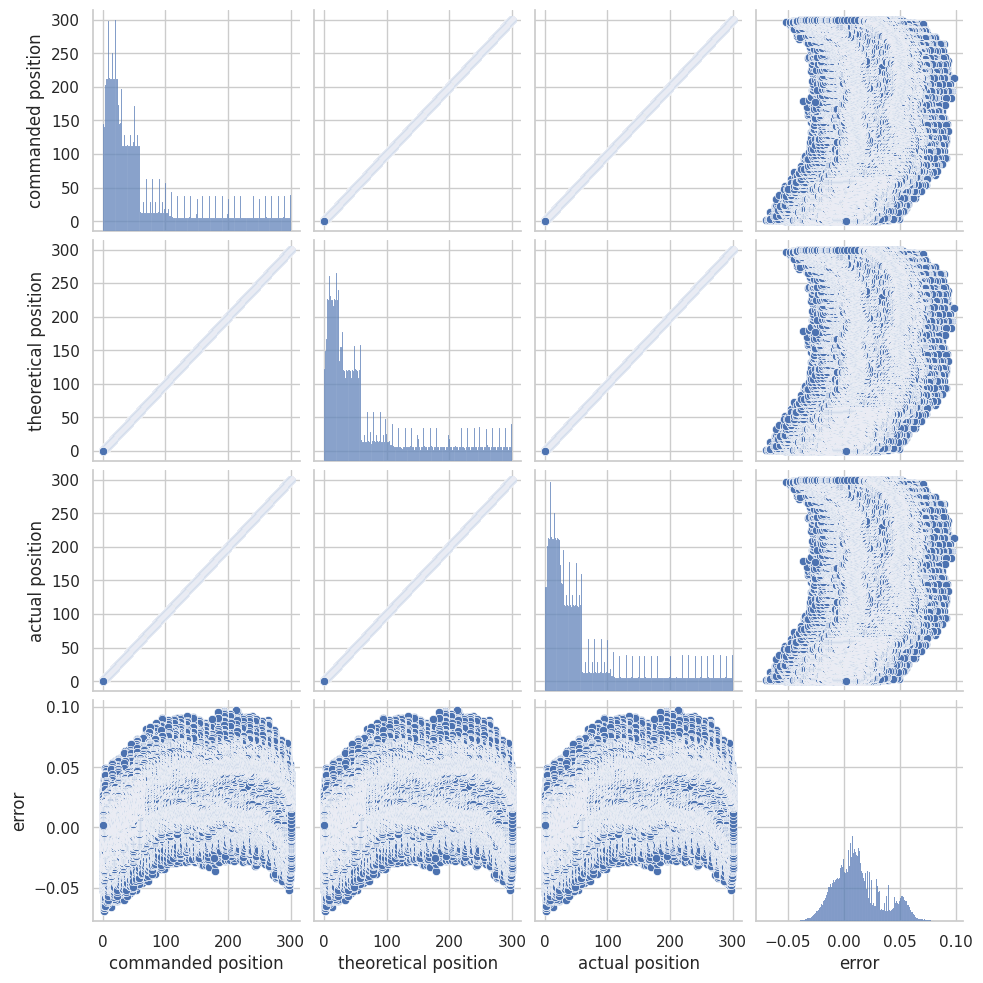

In [ ]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/03_pairplot__before_cleaning.png")

In [ ]:
# Checking skewness
check_skew = (data_l.skew(axis=0, skipna=True, numeric_only=True))
print(check_skew)

commanded position      1.162754
theoretical position    1.162877
actual position         1.162478
error                   0.477539
dtype: float64


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fit = std_scaler.fit(data_l)
output = std_scaler.transform(data_l)
data_l = pd.DataFrame(output, columns=data_l.columns, index=list(data_l.index.values))

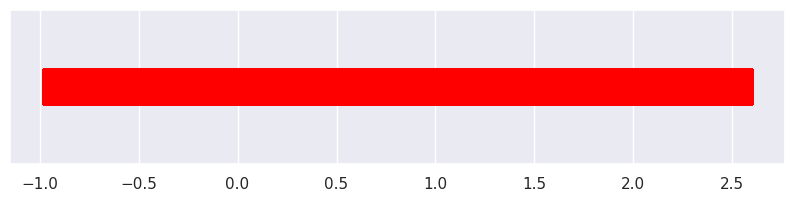

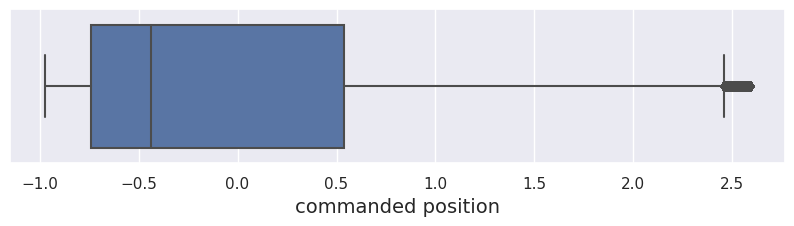

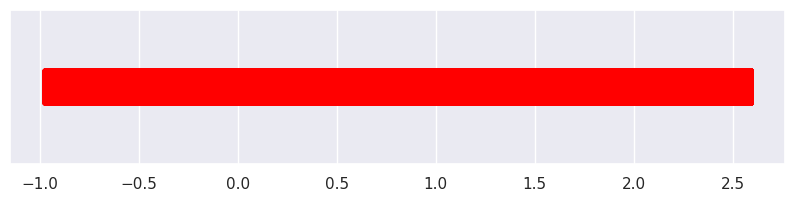

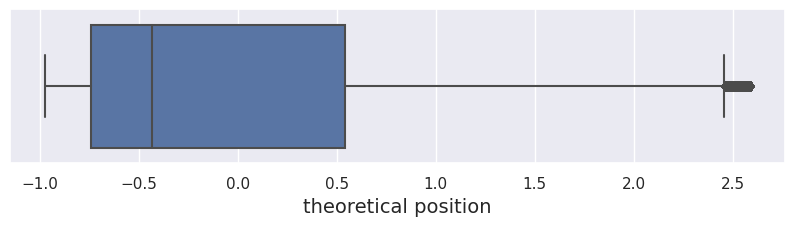

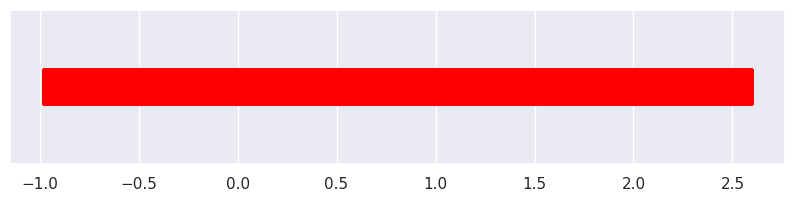

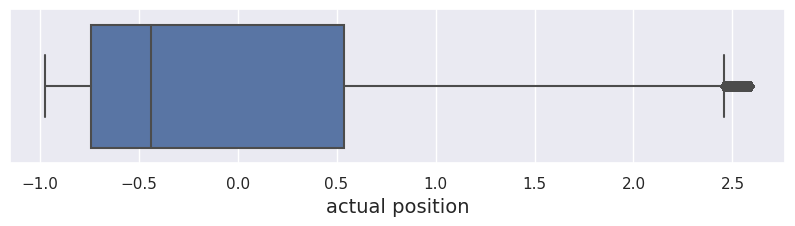

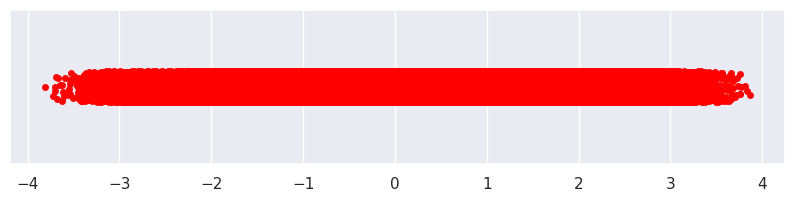

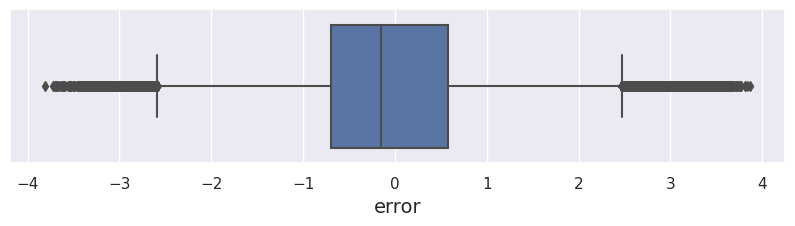

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visuallization for outliers by using stripplot & boxplot (Seaborn)
for feature in data_l.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_l, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_l, x=feature)
    plt.show()
    #plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/04_{feature}_before_cleaning.png")
    #print('\n')

In [ ]:
# Detecting outliers
def detect_outlier(data_l):
    Q1, Q3 = np.percentile(data_l, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = data_l[((data_l<lower_bound) | (data_l>upper_bound))]
    return outlier

for feature in data_l.columns:
    outlier = detect_outlier(data_l[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 58194
Max outlier value: 2.587865080820004
Min outlier value: 2.4554159973614165


Name of column: theoretical position
Number of outliers: 57337
Max outlier value: 2.5865726882921987
Min outlier value: 2.460390997702182


Name of column: actual position
Number of outliers: 57977
Max outlier value: 2.5874086036060615
Min outlier value: 2.455761613943965


Name of column: error
Number of outliers: 23818
Max outlier value: 3.864115860763296
Min outlier value: -3.80867213528588




In [ ]:
data_l.shape

(3130589, 4)

In [ ]:
def detect_outlier(column):
    """
    Detects outliers in a pandas series and returns their indices.
    """
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column < lower_bound) | (column > upper_bound)].index

# List to hold indices of rows with outliers
outlier_indices = []

# Detecting outliers in each column and adding their indices to the list
for i in data_l.columns:
    outlier_idx = detect_outlier(data_l[i])
    outlier_indices.extend(outlier_idx)

# Removing duplicates in the list of indices
outlier_indices = list(set(outlier_indices))

# Deleting rows with outliers
data_l = data_l.drop(outlier_indices)


NameError: ignored

In [ ]:
data_l.shape # deleted 81939 outliers

(3048649, 4)

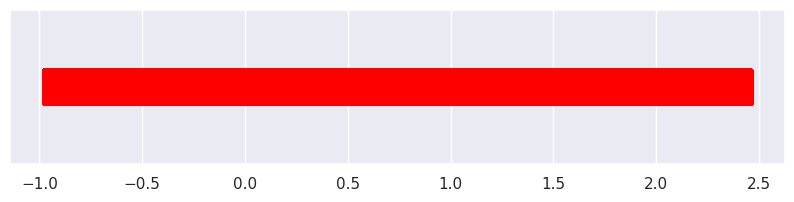

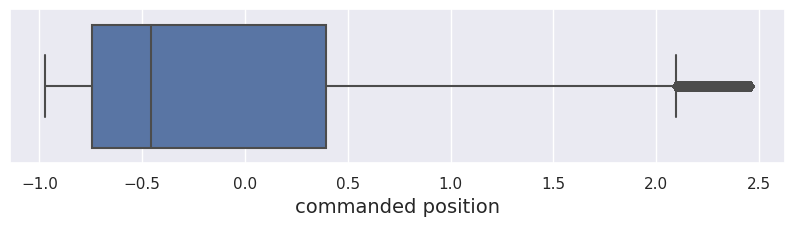

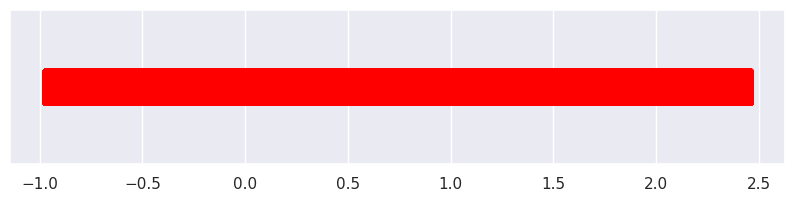

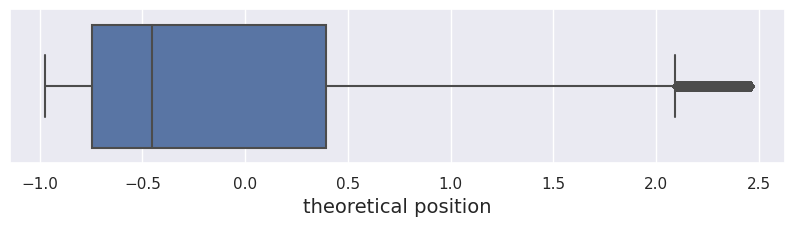

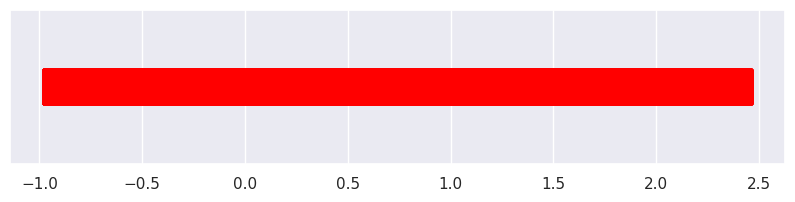

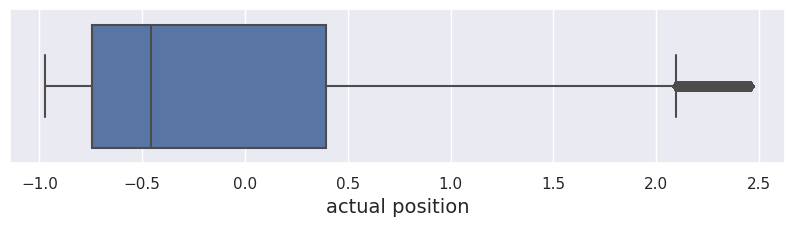

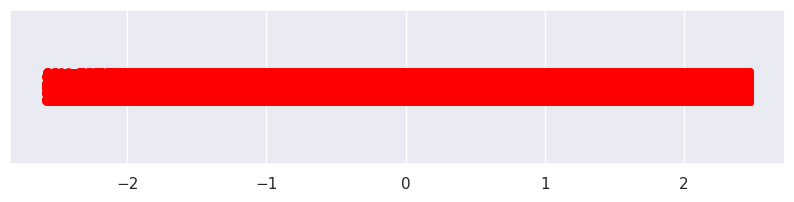

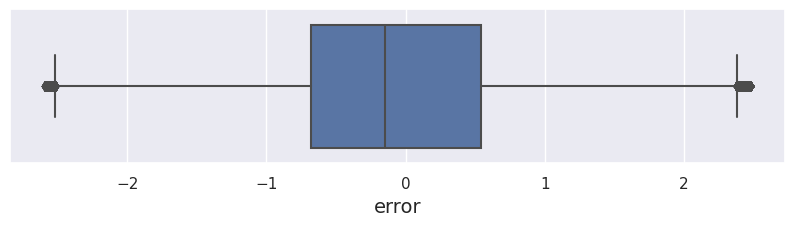

In [ ]:
# Visuallization by using stripplot & boxplot (Seaborn)
for feature in data_l.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_l, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_l, x=feature)
    plt.show()

    print('\n')

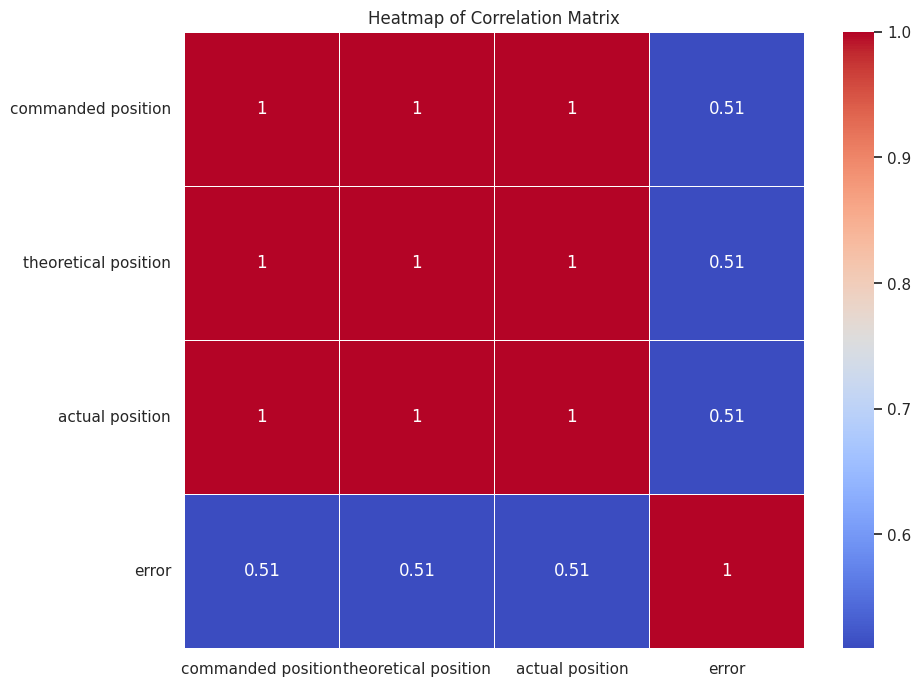

<Figure size 1000x200 with 0 Axes>

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_l.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()
plt.savefig(f"/content/drive/My Drive/Colab Notebooks/b_images/06_heatmap_after_cleaning.png")

In [ ]:
# Normalize the data
scaler_X_l = MinMaxScaler()
scaler_Y_l = MinMaxScaler()
X_l = scaler_X_l.fit_transform(X_l)
Y_l = scaler_Y_l.fit_transform(Y_l.reshape(-1, 1))

In [ ]:
data_l.shape

(3048649, 4)

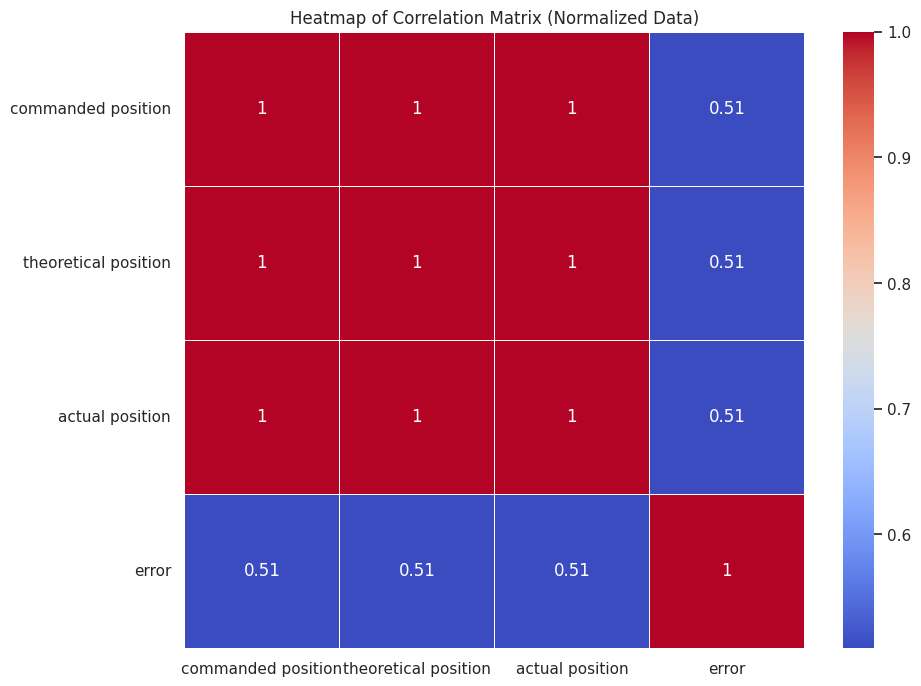

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_l_normalized = pd.DataFrame(scaler.fit_transform(data_l.iloc[:, :-1]), columns=data_l.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_l_normalized['error'] = data_l['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_l_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/07_heatmap_after_normalizing.png")


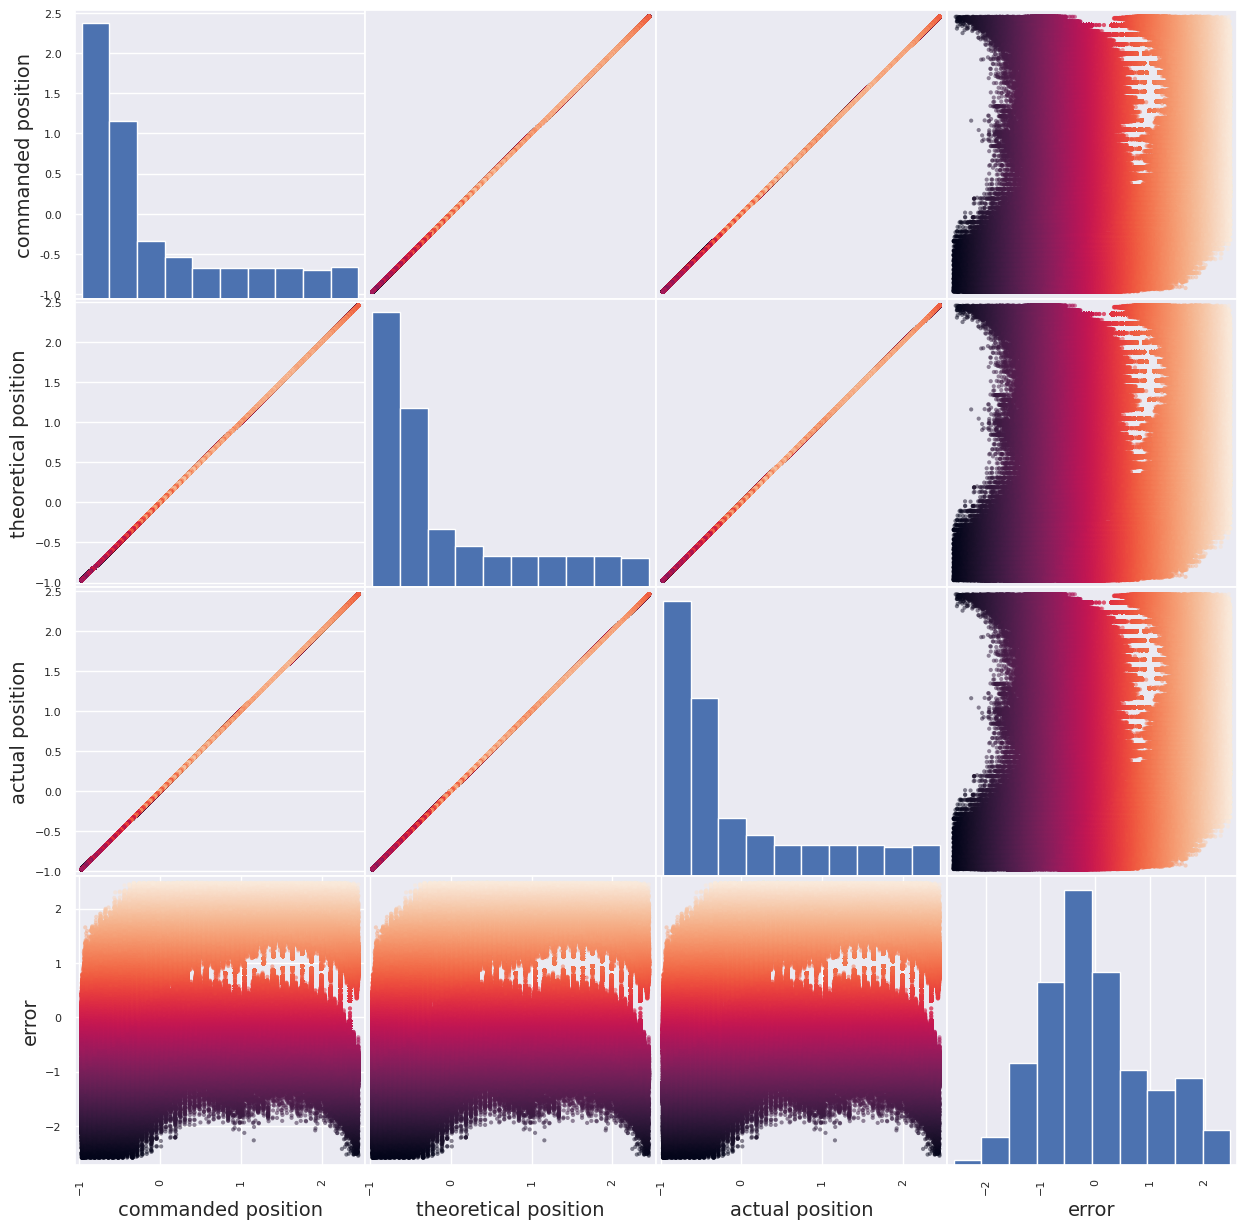

In [ ]:
from pandas.plotting import scatter_matrix
# Visuallization by using stripplot & boxplot (Seaborn)
scatter_matrix(data_l,
               c = data_l['error'],
               alpha=0.5,
               figsize=(15, 15),
               diagonal='hist')
plt.show()
#plt.savefig(f"/content/drive/My Drive/Colab Notebooks/l_images/07_scatter_matrix_after_normalizing.png")

In [ ]:
# Split data into training and testing sets
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

Epoch 1/8
62612/62612 [==============================] - 168s 3ms/step - loss: 0.0104 - val_loss: 0.0103
Epoch 2/8
62612/62612 [==============================] - 184s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 3/8
62612/62612 [==============================] - 186s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 4/8
62612/62612 [==============================] - 166s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 5/8
62612/62612 [==============================] - 184s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/8
62612/62612 [==============================] - 186s 3ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 7/8
62612/62612 [==============================] - 167s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 8/8
62612/62612 [==============================] - 187s 3ms/step - loss: 0.0102 - val_loss: 0.0102


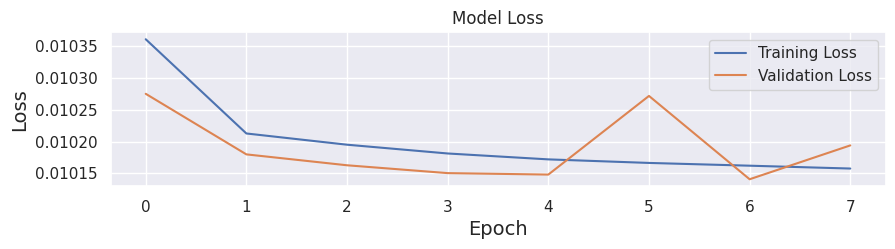

In [ ]:
import matplotlib.pyplot as plt

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and save the history
#epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_l, Y_train_l, epochs=8, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)

19567/19567 [==============================] - 31s 2ms/step
MSE on training data: 0.01017837177369391
MSE on testing data: 0.010164772258465784


Epoch 1/8
62612/62612 [==============================] - 104s 2ms/step - loss: 0.0208 - val_loss: 0.0174
Epoch 2/8
62612/62612 [==============================] - 103s 2ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 3/8
62612/62612 [==============================] - 102s 2ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 4/8
62612/62612 [==============================] - 109s 2ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 5/8
62612/62612 [==============================] - 105s 2ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 6/8
62612/62612 [==============================] - 102s 2ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 7/8
62612/62612 [==============================] - 108s 2ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 8/8
62612/62612 [==============================] - 102s 2ms/step - loss: 0.0174 - val_loss: 0.0174


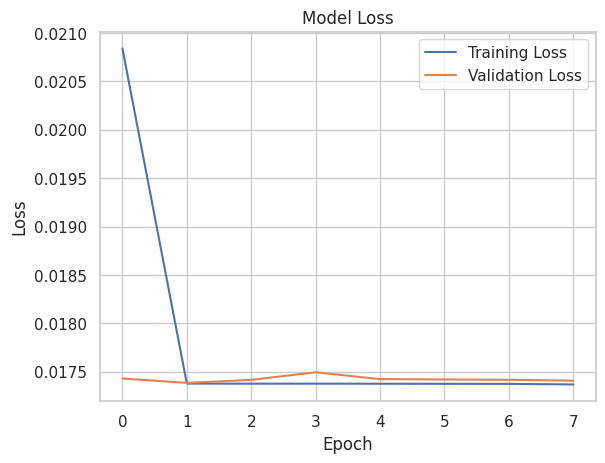

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1

# Define the neural network with L1 regularization
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='tanh', kernel_regularizer=l1(0.01)))
model.add(Dense(12, activation='tanh', kernel_regularizer=l1(0.01)))
model.add(Dense(8, activation='tanh', kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation='tanh', kernel_regularizer=l1(0.01)))  # Assuming it's a regression task with one output

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and save the history
history = model.fit(X_train_l, Y_train_l, epochs=8, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
#Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)

19567/19567 [==============================] - 30s 2ms/step
MSE on training data: 0.016990367665851384
MSE on testing data: 0.016979331131014835
